In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

path=r"C:\Users\akash\OneDrive\Desktop\data science\data files\Visadataset.csv"


visa_df=pd.read_csv(path)
cat_column=visa_df.select_dtypes(include='object').columns
num_column=visa_df.select_dtypes(exclude='object').columns

**bi variate analysis**

- we already seen uni variate analysis

- we performed the categorical column analysis

    - frequency table(value counts)

    - bar chart

    - relative frequency table(value counts normalized form)

    - pie chart

- we performed the numerical column analysis

    - histogram

    - distribution plots

    - box plot

    - outliers analysis

    - filling the outliers

- now we will do categorical-categorical analysis

- numerical-numerical analysis

- categorical-numerical analysis

**Categorical-Categorical**

- lets consider 2 columns

    - continent

    - case status

In [4]:
#continent

visa_df['continent'].value_counts()

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64

In [5]:
visa_df['case_status'].value_counts()

case_status
Certified    17018
Denied        8462
Name: count, dtype: int64

**task**

- find the certified observation continent wise

- find the denied observation continent wise

In [7]:
#step-1: make the 1st condition continent=='asia'
#step-2: make the 2nd condition caes_status=='certified'
#step-3: mkae 3rd condition : con1&con2
#step-4: then retrive the dataframe and count


con1=visa_df['continent']=='Asia'
con2=visa_df['case_status']=='Certified'
con3= con1&con2

visa_df[con3]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.65,Year,Y,Certified
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.14,Year,Y,Certified
6,EZYV07,Asia,Bachelor's,N,N,4985,1994,South,53635.39,Year,Y,Certified
8,EZYV09,Asia,Bachelor's,N,N,4810,2012,Midwest,74362.19,Year,Y,Certified
10,EZYV11,Asia,Master's,N,N,2465,2004,Midwest,83588.56,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified


In [8]:
#continent

continents=visa_df['continent'].value_counts().keys()
continents


Index(['Asia', 'Europe', 'North America', 'South America', 'Africa',
       'Oceania'],
      dtype='object', name='continent')

In [9]:
certified_list,denied_list=[],[]
for i in continents:
    con1=visa_df['continent']==i
    con2=visa_df['case_status']=='Certified'
    con3=visa_df['case_status']!='Certified'
    cert_con=con1&con2
    den_con=con1&con3
    certified_count=len(visa_df[cert_con])
    denied_count=len(visa_df[den_con])
    print(f'the number of certified visa from {i} is : {certified_count}')
    print(f'the number of denied visa from {i} is : {denied_count}')
    certified_list.append(certified_count)
    denied_list.append(denied_count)

the number of certified visa from Asia is : 11012
the number of denied visa from Asia is : 5849
the number of certified visa from Europe is : 2957
the number of denied visa from Europe is : 775
the number of certified visa from North America is : 2037
the number of denied visa from North America is : 1255
the number of certified visa from South America is : 493
the number of denied visa from South America is : 359
the number of certified visa from Africa is : 397
the number of denied visa from Africa is : 154
the number of certified visa from Oceania is : 122
the number of denied visa from Oceania is : 70


In [10]:
#create dataframe
cols=['certified','denined']
df1=pd.DataFrame(zip(certified_list,denied_list),columns=cols,index=continents)
df1

,certified,denined
continent,,
Asia,11012,5849
Europe,2957,775
North America,2037,1255
South America,493,359
Africa,397,154
Oceania,122,70


**cross tab**

- the above data frame we can make by using a method : **cross tab**

- it is availabe in pandas

- it takes 2 arguments

    - index

    - column

- in above dataframe index is used: **continent** column

- in above dataframe data is used: **case_status** column

In [12]:
idx_column=visa_df['continent']
data_column=visa_df['case_status']
df2=pd.crosstab(idx_column,data_column)
df2

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [13]:
idx_column=visa_df['continent']
data_column=[visa_df['education_of_employee'],visa_df['case_status']]
df2=pd.crosstab(idx_column,data_column)
df2

education_of_employee Bachelor's        Doctorate        High School         \
case_status            Certified Denied Certified Denied   Certified Denied   
continent                                                                     
Africa                        81     62        43     11          23     43   
Asia                        4407   2761       780    143         676   1614   
Europe                      1040    259       788     58         162    328   
North America                641    584       207     51         210    191   
Oceania                       38     28        19      3          19     17   
South America                160    173        75     14          74     63   

education_of_employee  Master's         
case_status           Certified Denied  
continent                               
Africa                      250     38  
Asia                       5149   1331  
Europe                      967    130  
North America               979    429  
Oceania                      46     22  
South America               184    109

<Axes: xlabel='continent'>

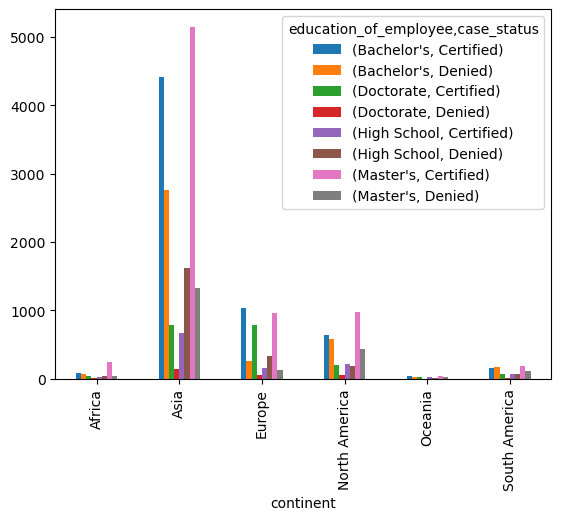

In [14]:
df2.plot(kind='bar')

**14.2.23**

**Numerical vs Numerical**

- to understand numerical column relation we need to plot scatter plot

- scatter plot gives the relation between 2 numerical column

- bar chart - piechart - histogram - scatter plot

- scatter plot under the matplotlib package

- **plt.scatter**

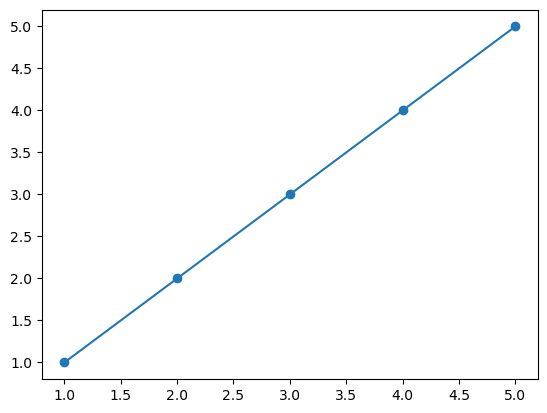

In [18]:
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.scatter(x,y)
plt.plot(x,y)

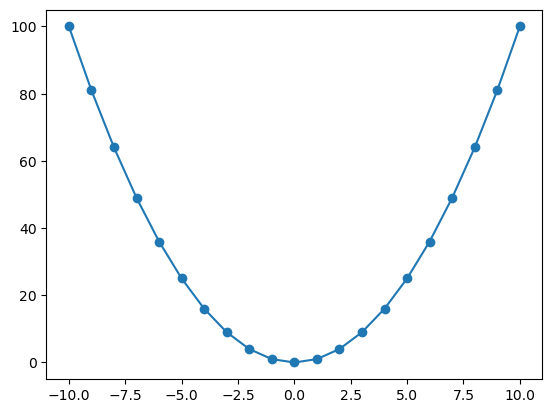

In [19]:
num=[i for i in range(-10,11)]
sqr=[i*i for i in num]
plt.scatter(num,sqr)
plt.plot(num,sqr)

In [20]:
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

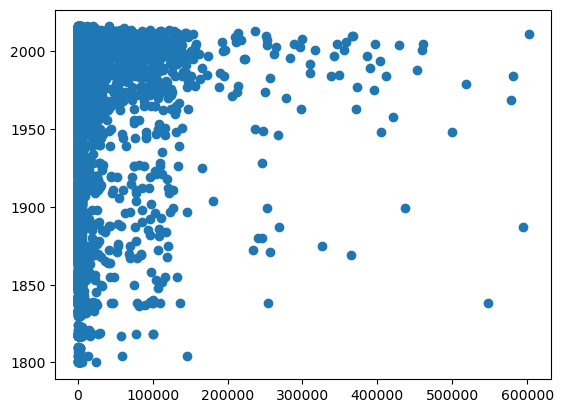

In [21]:
#step-1: read one numerical column 
#step-2: read another numerical column 
#step-3: plot the scatter plot

col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
plt.scatter(col1,col2)
#plt.plot(emp,esstb)

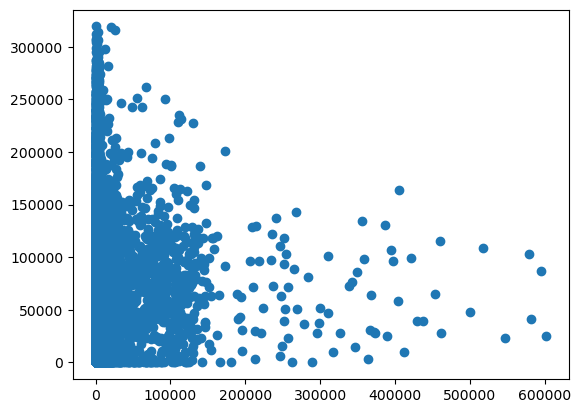

In [22]:
col1=visa_df['no_of_employees']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

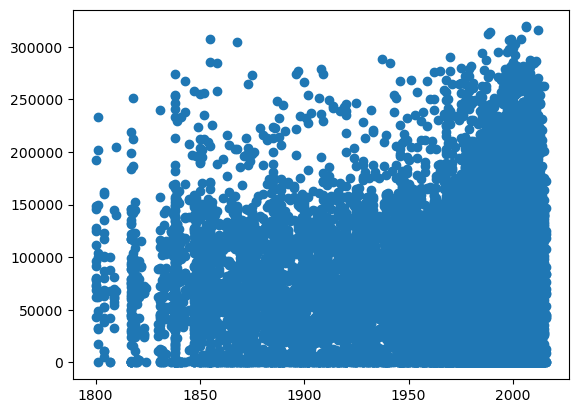

In [23]:
col1=visa_df['yr_of_estab']
col2=visa_df['prevailing_wage']
plt.scatter(col1,col2)

Text(0, 0.5, 'prevailing_wage')

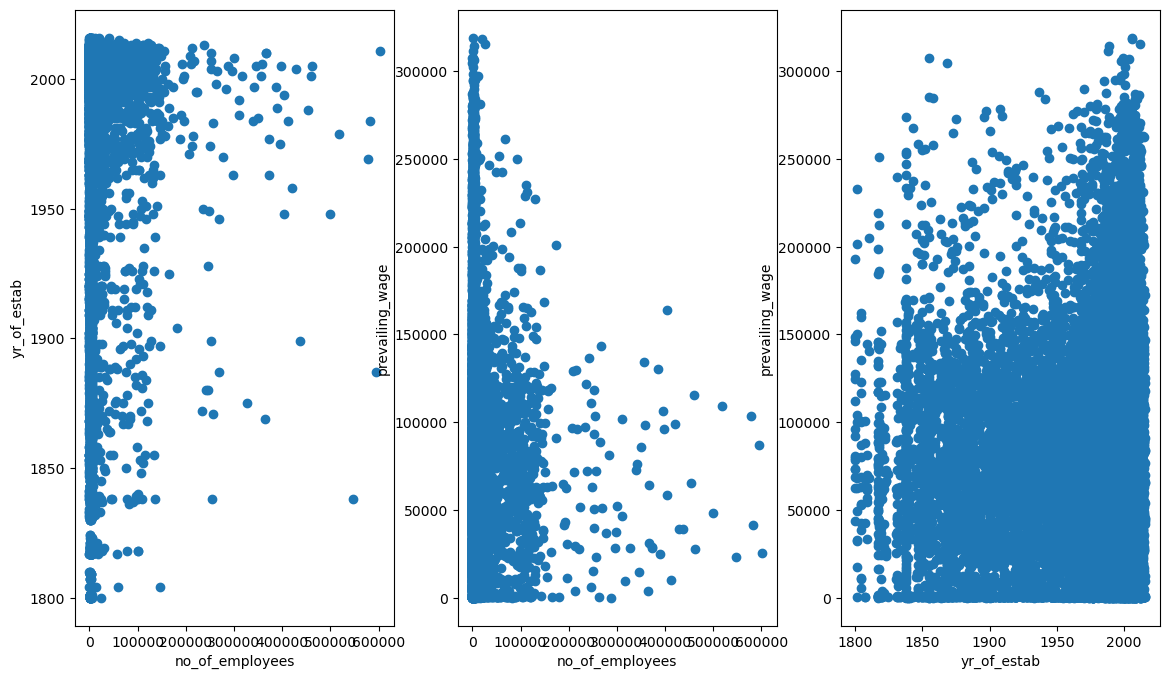

In [24]:
col1=visa_df['no_of_employees']
col2=visa_df['yr_of_estab']
col3=visa_df['prevailing_wage']
plt.figure(figsize=(14,8))


plt.subplot(1,3,1).scatter(col1,col2)
plt.xlabel('no_of_employees')
plt.ylabel('yr_of_estab')
####################################
plt.subplot(1,3,2).scatter(col1,col3)
plt.xlabel('no_of_employees')
plt.ylabel('prevailing_wage')
####################################
plt.subplot(1,3,3).scatter(col2,col3)
plt.xlabel('yr_of_estab')
plt.ylabel('prevailing_wage')

- implement the covariance function

- covariance vs correlation

    - covariance will tell about the column have raltion  or not 

    - covariance will explain about relation status

        - +ve relation

        - -ve relation

        - no relation

    - correlation tells about how much relation between 2 variable

    - it denotes with 'r'

    - r varies from -1 to 1

    - -1 to 0 indicates negative relation quantity

    - 0 to 1 indicates positive relation quantity

    - 0 indicates no relation 

**method name: corr**

In [27]:
visa_df.corr(numeric_only=True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


**Heat map**

- it is one of the important visualisation method,to show the matrix form of values

- it is under **seaborn** package

- in every matrix we have heighest values and lowest values availabe

- it will give colour visualisation

- also it provides colour bar (with colour indicates which value)

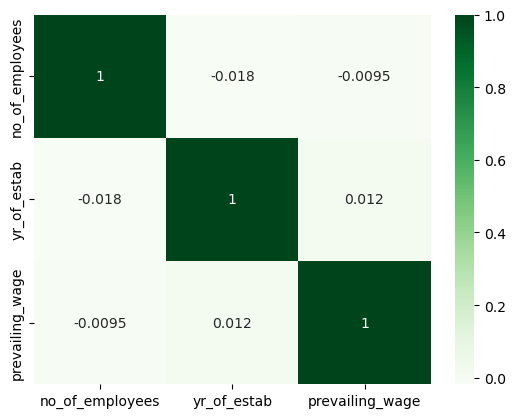

In [29]:
corr_data=visa_df.corr(numeric_only=True)
sns.heatmap(corr_data,annot=True,cmap='Greens')
plt.show()

In [30]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


- by seeing the graph we might not say the ralation status

- it is best practice get the percentage of relation using correlation

- all 3 column having approximately 0% of ralation

- no ralation means indipendent each other

- in ML we expect the input column shoould be indipendent each other

- we have 3 column 3*3 total 9 fields

- if a data has 20 columns then 20*20 total 400 fields

- thats why always go with heat map visualization 